In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/sample_data/processed.pkl"
tweets_data = pd.read_pickle(path)

In [ ]:
tweets_data["label"] = tweets_data["label"].str.strip()

In [ ]:
def removeSwiggy(tokens):
  return [token for token in tokens if token!="Swiggy" and token!="SwiggyCares"]

In [ ]:
tweets_data["text"] = tweets_data["text"].apply(removeSwiggy)
tweets_data["text"]

0        [Mahi_2510, swiggy_in, ultimate, answer, b, so...
1                                                   [hope]
2        [think, order, detail, number, present, yea, c...
3        [swiggy_in, People, complain, also, know, litt...
4        [even, know, mean, tagline, DMs, work, want, e...
                               ...                        
16707    [say, delivery, box, ready, deliver, cancel, o...
16708    [swiggy_in, Deliver, karta, nahi, install, kyo...
16709    [swiggy_in, thank, spill, drink, wait, call, i...
16710    [hello, use, swigggy, regularly, order, food, ...
16711     [Being_Humor, ZomatoIN, swiggy_in, help, friend]
Name: text, Length: 16712, dtype: object

In [ ]:
tweets_data["Vectors"] = tweets_data["Vectors"].apply(lambda tokens:np.array(tokens))

In [ ]:
type(tweets_data["Vectors"][0])

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
y = tweets_data["Labels"]
x = tweets_data["Vectors"]
x.head()

0    [[0.16614594, -0.09314724, 0.20499872, -0.0136...
1    [[0.12343255, -0.13701224, 0.99457186, 0.93952...
2    [[0.12343255, -0.13701224, 0.99457186, 0.93952...
3    [[0.11458594, -0.5298158, 0.444316, 0.7047865,...
4    [[0.12343255, -0.13701224, 0.99457186, 0.93952...
Name: Vectors, dtype: object

In [ ]:
print(y)

0        0
1        1
2        1
3        1
4        2
        ..
16707    1
16708    0
16709    1
16710    1
16711    1
Name: Labels, Length: 16712, dtype: int64


In [ ]:
y.value_counts()

Labels
1    7817
2    7485
0    1410
Name: count, dtype: int64

In [ ]:
xTrain,xTest,yTrain,yTest = tts(x,y,random_state=1)
yTrain=np.array(yTrain)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# from keras.losses import CategoricalCrossentropy

In [ ]:
max_len = 100
xTrain = tf.keras.preprocessing.sequence.pad_sequences(xTrain, maxlen=max_len)
xTest  = tf.keras.preprocessing.sequence.pad_sequences(xTest, maxlen=max_len)

In [ ]:
type(xTrain[0])

numpy.ndarray

In [ ]:
yTrain = tf.keras.utils.to_categorical(yTrain)


In [ ]:
tf.convert_to_tensor(yTrain)

<tf.Tensor: shape=(12534, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
# model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len))
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=(100,10)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=3))

model.add(tf.keras.layers.Conv1D(filters=100, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=100, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256,activation="relu"))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dense(units=100,activation="relu"))
model.add(tf.keras.layers.Dense(units=100,activation="relu"))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
# model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(
    optimizer = "adam",
    metrics = ["accuracy"],
    loss = "categorical_crossentropy"
)

In [ ]:
model.fit(xTrain, yTrain, epochs=1000, batch_size=64)

Epoch 1/1000
196/196 [==============================] - 9s 32ms/step - loss: 0.8827 - accuracy: 0.5812
Epoch 2/1000
196/196 [==============================] - 6s 30ms/step - loss: 0.8439 - accuracy: 0.6170
Epoch 3/1000
196/196 [==============================] - 6s 29ms/step - loss: 0.8381 - accuracy: 0.6229
Epoch 4/1000
196/196 [==============================] - 6s 33ms/step - loss: 0.8309 - accuracy: 0.6300
Epoch 5/1000
196/196 [==============================] - 6s 28ms/step - loss: 0.8210 - accuracy: 0.6332
Epoch 6/1000
196/196 [==============================] - 7s 34ms/step - loss: 0.8119 - accuracy: 0.6417
Epoch 7/1000
196/196 [==============================] - 6s 28ms/step - loss: 0.8023 - accuracy: 0.6498
Epoch 8/1000
196/196 [==============================] - 7s 34ms/step - loss: 0.7864 - accuracy: 0.6597
Epoch 9/1000
196/196 [==============================] - 5s 28ms/step - loss: 0.7708 - accuracy: 0.6754
Epoch 10/1000
196/196 [==============================] - 7s 34ms/step - l

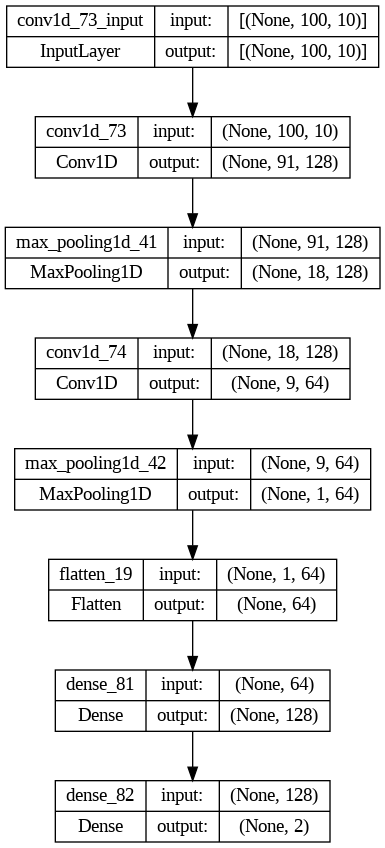

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_73 (Conv1D)          (None, 91, 128)           12928     
                                                                 
 max_pooling1d_41 (MaxPooli  (None, 18, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_74 (Conv1D)          (None, 9, 64)             81984     
                                                                 
 max_pooling1d_42 (MaxPooli  (None, 1, 64)             0         
 ng1D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 128)             